### 1. Simple Neural Network

Tensorflow의 keras api를 활용 이하는 하나의 뉴런을 가지고 있는 가장 간단한 신경망

In [14]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential(
    [keras.layers.Dense(units=1, input_shape=[1])]
    )
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)

model.fit(xs, ys, epochs=100)
print(model.predict([7.0]))

Epoch 1/100
1/1 [==============================] - 0s 134ms/step - loss: 0.2796
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1521
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0930
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0655
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0434
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0419
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0410
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0400
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 13/100
1/1 [==============================] - 0s 2ms/

### 2. Callback

epoch를 기준으로 학습시키는데, 성능을 기준으로 학습을 멈추고 싶다 -> callback

callback을 사용해서 각 epoch 학습 시 log를 참조하면, Early Stopping이 가능하다.

In [6]:
import os
import tensorflow as tf
from tensorflow import keras

# 절대 경로
current_dir = os.getcwd() 

# 상대 경로
data_path = os.path.join(current_dir, "datasets/mnist.npz") 

# 데이터 가져오기
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data(path=data_path)

# 정규화, 픽셀은 255까지 값이 있다.
x_train = x_train / 255.0

In [7]:
# 데이터 shape확인
data_shape = x_train.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")

There are 60000 examples with shape (28, 28)


In [48]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}, crit=0.99):
        if logs.get('accuracy') is not None and logs.get('accuracy') > crit:
            print(f"\nReached {crit}% accuracy so cancelling training!") 
            self.model.stop_training = True

def train_mnist(x_train, y_train):

    model = tf.keras.models.Sequential([
        #tensorflow는 input shape을 정의하지 않아도 된다.
        tf.keras.layers.Flatten(), 
        # tf.nn은 pytouch와 유사한 저수준 라이브러리.
        tf.keras.layers.Dense(128, activation=tf.nn.relu), 
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]) 
    callbacks = myCallback() 

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
    
    history = model.fit(x_train, y_train, epochs=10, callbacks=callbacks)
    return history

In [49]:
hist = train_mnist(x_train, y_train)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2589 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1145 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0774 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0587 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0453 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0363 - accuracy: 0.9885
Epoch 7/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9912
Reached 0.99% accuracy so cancelling training!
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0282 - accuracy: 0.9912


### 3. Convolution Nueral Network

사진은 dnn으로 학습할 시 layer가 1차원이기 때문에 flatten을 해서 학습을 하게되고, 

 2차원의 특징이 손실된다.

이를 보존하기 위해서 layer를 2차원으로 구성한 것, 그것을 filter라고 부르고

layer마다 다수의 filter를 지니고, 이를 학습하게 된다.



In [16]:
import tensorflow as tf

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

cnn 이 acc가 더 뛰어나다

In [17]:
dnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

cnn_model = tf.keras.models.Sequential([
                                                         
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
print(f'\nMODEL TRAINING:')
dnn_model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION:')
dnn_test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5000 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3735 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3372 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3127 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2949 - accuracy: 0.8914

MODEL EVALUATION:
313/313 [==============================] - 0s 930us/step - loss: 0.3554 - accuracy: 0.8750


In [19]:
# 각 layer별 정보를 볼 수 있다.
cnn_model.summary()

print(f'\nMODEL TRAINING:')
cnn_model.fit(training_images, training_labels, epochs=5)

print(f'\nMODEL EVALUATION:')
cnn_test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [20]:
# 테스트 케이스의 label
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


- Keras api는 각 convolution, pooling, dense의 layer api를 제공한다.
이미지 3가지가 각 레이어를 지나면서 어떤 특징이 추출되는지 확인 할 수 있다.

1/1 [==============================] - 0s 15ms/step


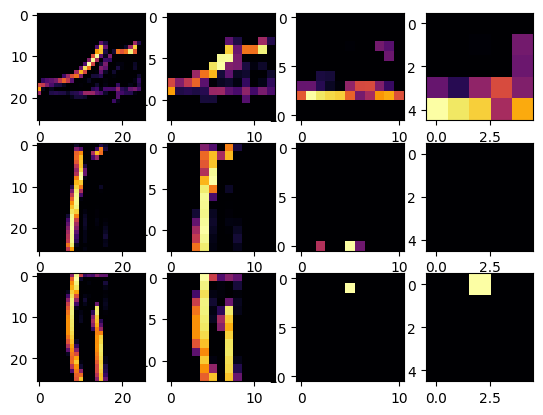

In [50]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0 
SECOND_IMAGE = 13
THIRD_IMAGE = 2

# 필터의 번호라고 보면 된다.
# 레이어를 나오고 특성맵의 차원이 
# (batch_size, 26, 26, 32) 인 경우 32개 중에 고를 수 있다.
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in cnn_model.layers]
activation_model = tf.keras.models.Model(inputs = cnn_model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

- filter에 따라서 이미지가 어떻게 변환되는지 확인해 볼 수 있다.

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_78748\1894017206.py:5: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  ascent_image = misc.ascent()


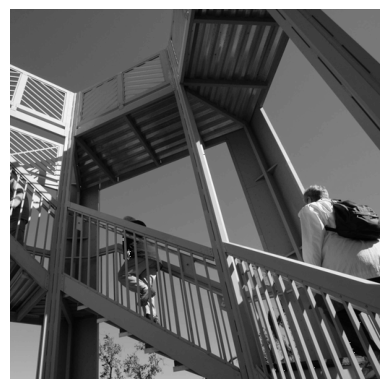

In [43]:
from scipy import misc
import matplotlib.pyplot as plt

# load the ascent image
ascent_image = misc.ascent()
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [40]:
import numpy as np

image_transformed = np.copy(ascent_image)
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]
weight  = 1

def fiiter_test(filter):

  # 직접 컨볼루션을 하는 과정
  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
        convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
        convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
        convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
        convolution = convolution + (ascent_image[x, y] * filter[1][1])    
        convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
        convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
        convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
        convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
        
        convolution = convolution * weight   
        
        # 경계값 확인
        if(convolution<0):
          convolution=0
        if(convolution>255):
          convolution=255
        # 이미지 수정
        image_transformed[x, y] = convolution
        
  plt.gray()
  plt.grid(False)
  plt.imshow(image_transformed)
  plt.show()
  
filter1 = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter2 = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter3 = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]


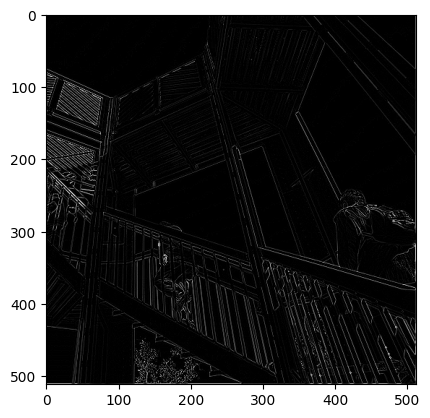

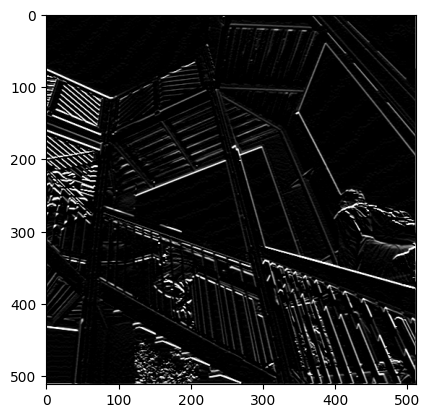

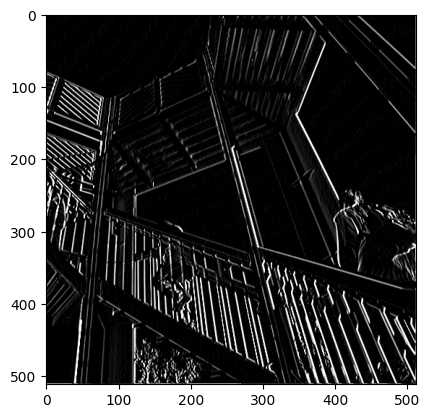

In [52]:
fiiter_test(filter1)
fiiter_test(filter2)
fiiter_test(filter3)

### 4. ImageDataGenerator

사진이 거꾸로 찍혀있거나, 사이즈가 좀 다른 등, 이미지가 학습에 적합하지 않은 경우ImageDataGenerator를 사용하자.

In [55]:
import zipfile

# Unzip training set
local_zip = './datasets/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./datasets/horse-or-human')

# Unzip validation set
local_zip = './datasets/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./datasets/validation-horse-or-human')

zip_ref.close()

In [56]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./datasets/horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./datasets/horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./datasets/validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./datasets/validation-horse-or-human/humans')

In [57]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_hames = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_hames[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
TRAIN SET HUMANS: ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
VAL SET HORSES: ['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
VAL SET HUMANS: ['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [58]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [59]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [60]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 64)     

In [61]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './datasets/horse-or-human/',
        target_size=(150, 150),
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        './datasets/validation-horse-or-human/',
        target_size=(150, 150), 
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [64]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 10s 1s/step - loss: 2.2581 - accuracy: 0.4894 - val_loss: 0.6850 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 10s 1s/step - loss: 0.6529 - accuracy: 0.6377 - val_loss: 0.5471 - val_accuracy: 0.7148
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.5210 - accuracy: 0.8065 - val_loss: 0.7238 - val_accuracy: 0.6719
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.3954 - accuracy: 0.8476 - val_loss: 1.1913 - val_accuracy: 0.7344
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.2471 - accuracy: 0.8999 - val_loss: 0.9929 - val_accuracy: 0.8359
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.2917 - accuracy: 0.8754 - val_loss: 0.9557 - val_accuracy: 0.8438
Epoch 7/15
8/8 [==============================] - 10s 1s/step - loss: 0.4487 - accuracy: 0.8521 - val_loss: 0.9361 - val_accuracy: 0.8125
Epoch 8/15
8/8 [======================

In [88]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os

images = os.listdir("./src/02_tf")

print(images)

for i in images:
 print()
 # predicting images
 path = './src/02_tf/' + i
 img = load_img(path, target_size=(150, 150))
 x = img_to_array(img)
 x /= 255
 x = np.expand_dims(x, axis=0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size=10)
 print(classes[0])
 if classes[0]>0.5:
   print(i + " is a human")
 else:
   print(i + " is a horse")

['horse.jpg', 'human04-28.png', 'Pikachu.png', 'received_753241878370692.jpeg', '임수형.jpg']

1/1 [==============================] - 0s 20ms/step
[1.6981106e-06]
horse.jpg is a horse

1/1 [==============================] - 0s 20ms/step
[0.97552717]
human04-28.png is a human

1/1 [==============================] - 0s 22ms/step
[6.820106e-05]
Pikachu.png is a horse

1/1 [==============================] - 0s 21ms/step
[0.213751]
received_753241878370692.jpeg is a horse

1/1 [==============================] - 0s 19ms/step
[0.0255135]
임수형.jpg is a horse


1/1 [==============================] - 0s 79ms/step


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_78748\2635218654.py:38: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


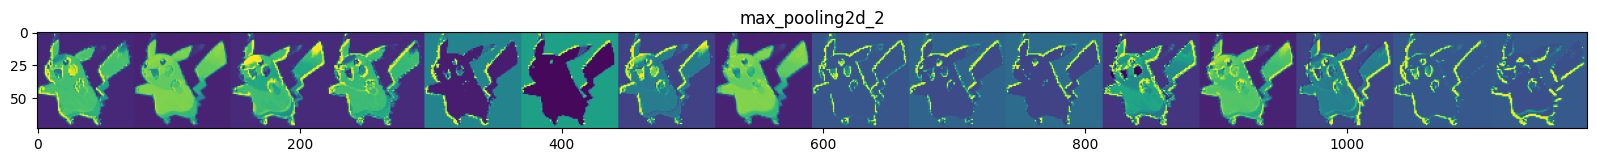

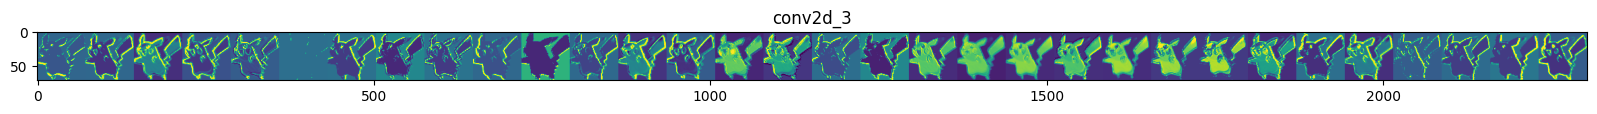

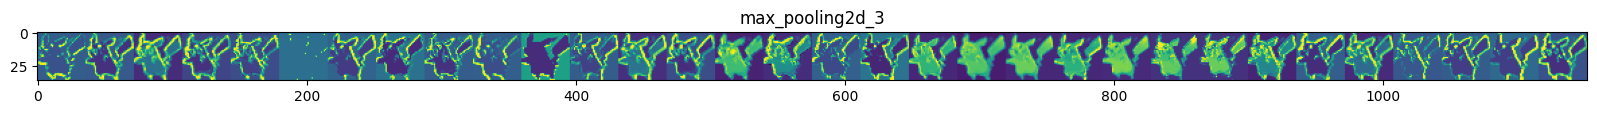

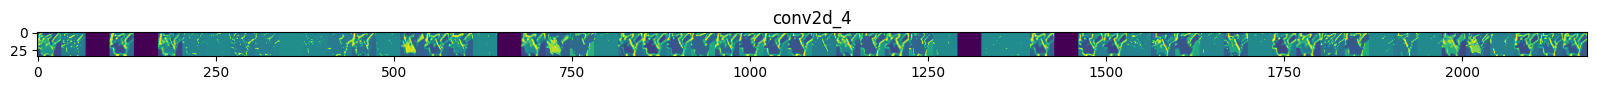

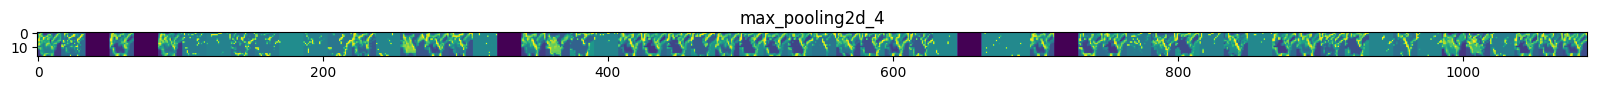

In [87]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)


# img_path = "./src/02_tf/임수형.jpg"
img_path = "./src/02_tf/Pikachu.png"


img = load_img(img_path, target_size=(150, 150))  
x = img_to_array(img)  
x = x.reshape((1,) + x.shape)  

x /= 255

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      display_grid[:, i * size : (i + 1) * size] = x
    
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')